## Perfect predictors

Remember how we noted earlier that logistic regression has issue fitting perfectly separated data? In logistic regression, perfectly separated data results in infinite odds ratio ($\beta$). In Cox regression, hazard takes place of odds so there may be a concern if we have to worry about anything here. The answer it "Yes, we do.".

Perfect predictors in Cox regression are predictors $x$ whose ranks exactly matches ranks of event times (their Spearman correlation = 1). Here is a visual example of a modified sample data where we swapped event times for subjects C and D:

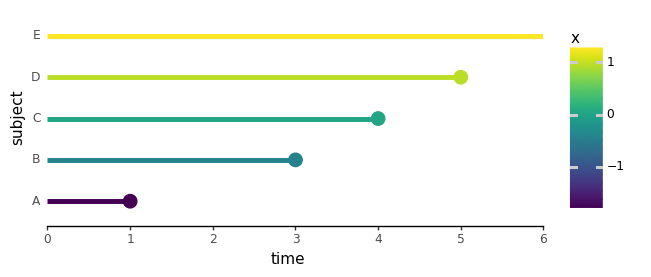

<ggplot: (8747956918760)>

In [1]:
import numpy as np
import pandas as pd
from cox.plots import (
    plot_subject_event_times,
    animate_subject_event_times_and_mark_at_risk,
    plot_cost_vs_beta,
)


perfect_df =  pd.DataFrame({
    'subject': ['A', 'B', 'C', 'D', 'E'],
    'time': [1, 3, 4, 5, 6],
    'event': [1, 1, 1, 1, 0],
    'x': [-1.7, -0.4, 0.0, 0.9, 1.2],
})

plot_subject_event_times(perfect_df, color_map='x')

In [2]:
animate_subject_event_times_and_mark_at_risk(
    perfect_df, color_map='x'
).save('../images/cox_likelihood_fitting_perfect.gif')

![animated_likelihood_fitting](../images/cox_likelihood_fitting_perfect.gif)

In order to understand why these "perfect predictors" can be problematic for statistical inference, we will again plot our negative log-likelihood cost vs $\beta$:

In [3]:
def event_time_and_x_from_subject(df, subject):
    subject_with_event_df = df.query(f"subject == '{subject}' & event == 1")
    if subject_with_event_df.empty: # For censored subjects return infinite time
        return (np.inf, 0)
    return subject_with_event_df.iloc[0][['time', 'x']]

def subjects_at_risk_data(df, subject):
    time = event_time_and_x_from_subject(df, subject)[0]
    return df.query(f'time >= {time}')

def log_likelihood(df, subject, beta):
    x_subjects_at_risk = subjects_at_risk_data(df, subject)['x']
    x_subject = event_time_and_x_from_subject(df, subject)[1]
    at_risk_hazards = np.exp(beta * x_subjects_at_risk)
    return beta * x_subject - np.log(np.sum(at_risk_hazards))

def neg_log_likelihood_for_all_subjects(df, beta):
    subjects = df.query("event == 1")['subject'].tolist()
    neg_log_likelihoods = [-log_likelihood(df, subject, beta) for subject in subjects]
    return pd.DataFrame({
        'subject': subjects,
        'neg_log_likelihood': neg_log_likelihoods
    })

def neg_log_likelihood_all_subjects_sweep_betas(df, betas=np.arange(-5, 5, 0.1)):
    loglikelihoods_per_beta = []
    for beta in betas:
        beta_df = neg_log_likelihood_for_all_subjects(df, beta)
        beta_df.insert(0, 'beta', beta) # Add beta column
        loglikelihoods_per_beta.append(beta_df)
    return pd.concat(loglikelihoods_per_beta)

negloglik_sweep_betas_perfect_df = neg_log_likelihood_all_subjects_sweep_betas(
    perfect_df,
    betas=np.arange(-5, 5, 0.1)
)
plot_cost_vs_beta(negloglik_sweep_betas_perfect_df, width=0.1)

NameError: name 'plot_cost_vs_beta' is not defined